In [10]:
!pip install tensorflow matplotlib numpy
!pip install pillow opencv-python

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import files

In [34]:
deforested_dir = "/content/dataset/deforestation"
no_deforested_dir = "/content/dataset/no_deforestation"

In [35]:
data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [38]:
train_generator = data_gen.flow_from_directory(
    "/content/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

Found 75 images belonging to 3 classes.


In [39]:
val_generator = data_gen.flow_from_directory(
    "/content/dataset",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=True
)

Found 18 images belonging to 3 classes.


In [40]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2880 - loss: -2.3423 - val_accuracy: 0.5556 - val_loss: -24.6213
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5468 - loss: -41.6114 - val_accuracy: 0.5556 - val_loss: -172.9725
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4981 - loss: -241.7529 - val_accuracy: 0.5556 - val_loss: -710.6699
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5024 - loss: -1030.4478 - val_accuracy: 0.5556 - val_loss: -2305.9150
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5448 - loss: -2771.7922 - val_accuracy: 0.5556 - val_loss: -5967.5449
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5518 - loss: -6505.0527 - val_accuracy: 0.5556 - val_loss: -14115.7363
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5526 - loss: -15802.4961 - val_accuracy: 0.5556 - val_loss: -29775.2500
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5128 - loss: -32835.6055 - v

Text(0.5, 1.0, 'Accuracy Over Epochs')

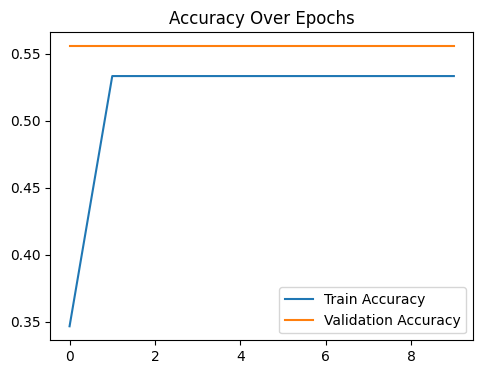

In [42]:
model.save("/content/deforestation_classifier.h5")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

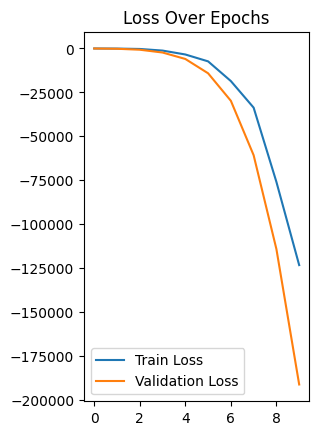

In [43]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [57]:
def predict_image(image_path, model):
    img = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    prediction = model.predict(img_array)[0][0]
    confidence = prediction * 100 if prediction > 0.5 else (1 - prediction) * 100
    label = "Deforested" if prediction > 0.5 else "Not Deforested"
    return label, confidence

Saving img25.jpg to img25.jpg


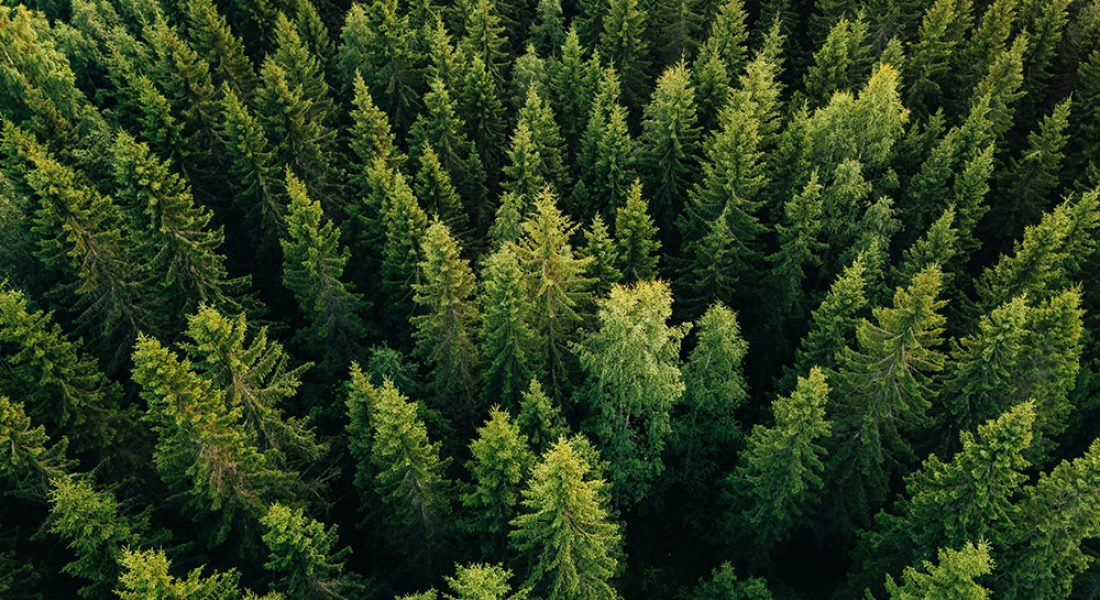

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediction: Deforested with 100.00% confidence


In [61]:
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        img = Image.open(filename)
        display(img)  # Display the uploaded image
        return filename
    return None

# Let user upload an image
test_image = upload_image()
if test_image:
    label, confidence = predict_image(test_image, model)
    print(f"Prediction: {label} with {confidence:.2f}% confidence")
else:
    print("No image uploaded.")
